In [ ]:
#Image Preprocessing Data pipeline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "brain_tumor_dataset/",
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "brain_tumor_dataset/",
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

/Users/gagan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
# Model Architecture
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/Users/gagan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5


/Users/gagan/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5610 - loss: 0.7533 - val_accuracy: 0.7000 - val_loss: 0.6002
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7601 - loss: 0.5750 - val_accuracy: 0.7400 - val_loss: 0.5447
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7731 - loss: 0.5094 - val_accuracy: 0.7400 - val_loss: 0.5353
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.8513 - loss: 0.4022 - val_accuracy: 0.7600 - val_loss: 0.5598
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8378 - loss: 0.4143 - val_accuracy: 0.7600 - val_loss: 0.5185


In [ ]:
# Evaluate the model
loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7567 - loss: 0.5118
Validation Accuracy: 0.7599999904632568


In [ ]:
# Predictions
import numpy as np

y_pred = model.predict(val_data)
y_pred = (y_pred > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
#true labels
y_true = val_data.classes

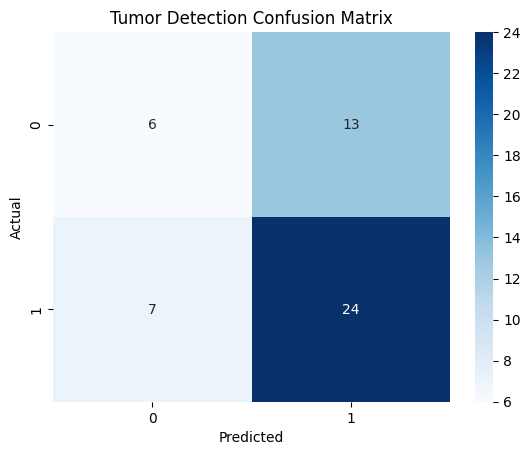

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tumor Detection Confusion Matrix")
plt.show()

In [9]:
model.save("tumor_detector.h5")

In [ ]:
# Load and preprocess a single image for prediction
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("test_mri.jpg", target_size=(128,128))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

In [ ]:
# Make a prediction
pred = model.predict(img)

if pred[0][0] > 0.5:
    print("Tumor Detected")
else:
    print("No Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Tumor Detected


In [18]:
pred = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [19]:
#update your prediction code
pred = model.predict(img)[0][0]
confidence = pred * 100

if pred > 0.5:
    label = "Tumor Detected"
else:
    label = "No Tumor"

print(f"Prediction: {label}")
print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction: Tumor Detected
Confidence: 79.09%


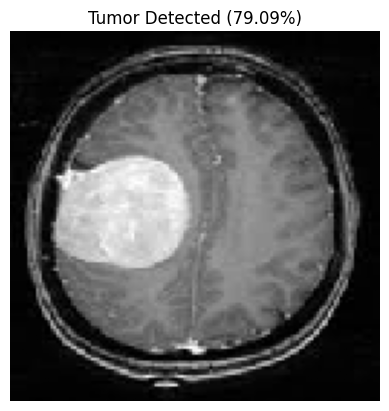

In [ ]:
#show results
import matplotlib.pyplot as plt

plt.imshow(img[0])
plt.title(f"{label} ({confidence:.2f}%)")
plt.axis('off')
plt.show()